# Deep Learning Assignment 2
### CS23MTECH14006 - MANAN PATEL

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from sklearn.model_selection import train_test_split

Q1)

Convolution function: It accepts an image input, a filter kernel, stride, padding, and the non linear function. The function must convolve the input image (after padding if specified) with the kernel (at the specified stride size) and generate an output activation after applying the specified non-linearity. Verify with the standard options for the non-linear activation functions - sigmoid, tanh, ReLU, Leaky ReLU. Display the input image (e.g. a small image of the IITH logo), the filter kernel, and the output activation map. Ensure that your function can accept multi-channel input and a corresponding kernel volume

In [2]:
def displayImg(img,title=""):
    plt.imshow(img)
    plt.title(title)
    plt.show()

**If you encounter an error while running the below code cell, it's advisable to execute it on Google Colab. Running this code locally may result in kernel failure**

The error surfaced after the completion of the entire assignment, making its cause unclear. It's worth noting that this code ran smoothly during the assignment.

Error message:

----------------------------------------------------------------

The Kernel crashed while executing code in the current cell or a previous cell. Please review the code in the cell(s) to identify a possible cause of the failure. Click here for more info. View Jupyter log for further details.

----------------------------------------------------------------

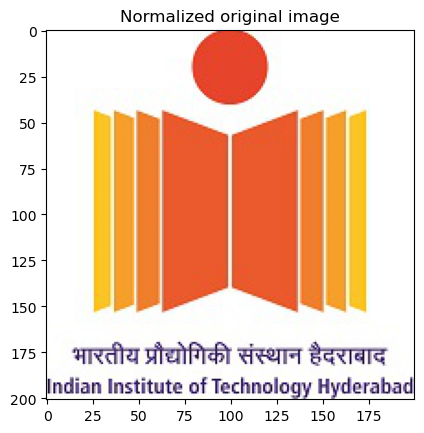

In [3]:
# Load an image and normalize its pixel values
img = mpimg.imread("logo.jpg")/255.0
displayImg(img,"Normalized original image")

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [5]:
def relu(x):
    return np.maximum(x, 0)

In [6]:
def softMax(x):
 return np.exp(x) / np.exp(x).sum()

In [7]:
def ConvolutionFunction(img,kernel,stride,padding,activationFunction):

    # Extract dimensions of the image
    imgH, imgW, imgC = img.shape

    # Extract dimensions of the kernel
    kerH, kerW, kerC = kernel.shape

    # Calculate output dimensions based on input dimensions, kernel size, stride, and padding
    outputH =  (imgH - kerH + 2 * padding) // stride + 1
    outputW =  (imgW - kerW + 2 * padding)  // stride + 1
    
    if padding > 0:
        padded_img = np.pad(img, pad_width=((padding, padding), (padding, padding), (0, 0)), mode='constant', constant_values=0)
    else:
        padded_img = img


    # Initialize activation map with zeros
    activationMap = np.zeros((outputH, outputW))


    # Loop through each output pixel location
    for row in range(outputH):
        for col in range(outputW):
            
            # Extract region of image from padded image
            region = padded_img[row * stride:row * stride + kerH, col * stride:col * stride + kerW, :]

            # Perform convolution operation by element-wise multiplication and summation
            activationMap[row][col] = np.sum(np.multiply(region, kernel))

    # Apply activation function to the output image and return
    return activationFunction(activationMap)


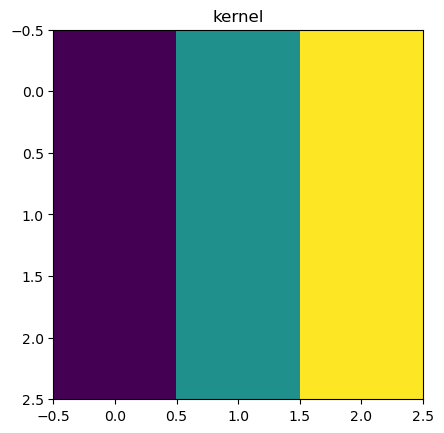

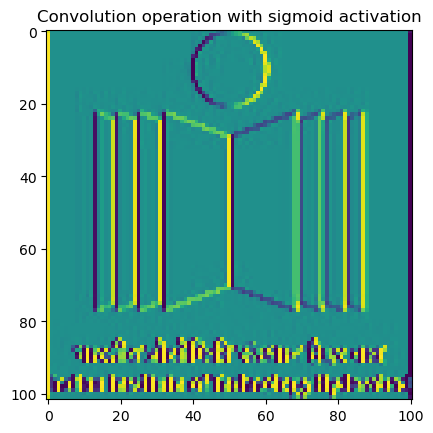

In [8]:
# Define a kernel for convolution operation
kernel = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])

# Stack the kernel along the third axis to create a 3-channel kernel
kernel = np.stack([kernel] * 3, axis=-1)

displayImg(kernel[:, :, 0],"kernel")

# Perform convolution operation using given kernel with sigmoid activation
outputImgSigmoid = ConvolutionFunction(img,kernel,stride=2,padding=2,activationFunction=sigmoid)

displayImg(outputImgSigmoid,"Convolution operation with sigmoid activation")


Q2)
Pooling function: It accepts as input the activation map output from the convolution function, a pooling function, and stride. The function must output the appropriately pooled activation map. Display the input activation map and the pooled output.

In [9]:
def maxPoolingFunction(img):
    return np.max(img)

In [10]:
def avgPoolingFunction(img):
    return np.mean(img)

In [11]:
def Pooling(activationMap,poolFunction,poolSize,stride = 2):

  # Extract height and width of the input
  inputH, inputW = activationMap.shape


  # Calculate output dimensions based on pool size and stride
  outputH =  (inputH - poolSize) // stride + 1
  outputW =  (inputW - poolSize)  // stride + 1

  # Initialize output image with zeros, specifying data type as float64
  output = np.zeros((outputH,outputW),dtype="float64")

  # Loop through each output pixel location
  for row in range(outputH):
      for col in range(outputW):
          
          # Extract the region from the input
          region = activationMap[row*stride:row*stride+poolSize, col*stride:col*stride+poolSize]
           # Apply the pooling function to the pool
          output[row, col] = poolFunction(region)

  return output

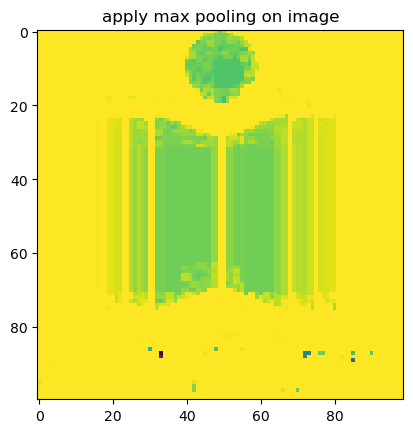

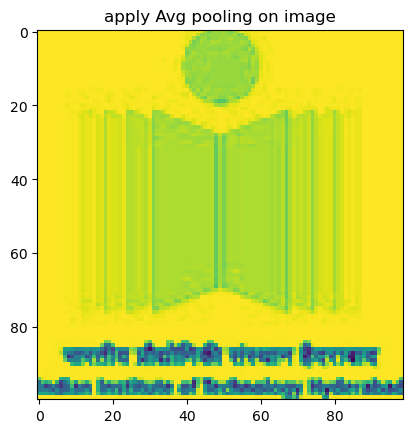

In [12]:
outputMaxPoolImg = Pooling(img[:,:,0],maxPoolingFunction,poolSize=3,stride=2)

displayImg(outputMaxPoolImg,"apply max pooling on image") 

outputAvgPoolImg = Pooling(img[:,:,0],avgPoolingFunction,3,2)

displayImg(outputAvgPoolImg,"apply Avg pooling on image")

Q3)
Convolution layer function: It accepts as input a volume (image or activation maps), number of filters, kernel dimensions, stride, padding, and the non-linear activation function. The function must convolve the input volume (after padding if specified) with each kernel (at the specified stride size) and generate an output activation volume after applying the specified non-linearity. Display the input image or activation maps, the filter kernels, and the output activation maps. Verify that the output of this function does indeed have the expected size (W × H × C) as discussed in class.

In [13]:
def Convolution_layer(input_volume,numOfFilter,kernelDim,stride,padding,activationFunction):
    # Initialize lists to store activation outputs and kernels
    activationOutputVolume =[]
    kernels=[]

    for _ in range(numOfFilter):

        # Generate a random kernel with specified dimensions
        kernel = np.random.randn(kernelDim, kernelDim, input_volume.shape[2])

        # Append the kernel to the list of kernels
        kernels.append(kernel)
        
        # Perform convolution using the ConvolutionFunction and store the activation output
        activationOutputVolume.append(ConvolutionFunction(input_volume,kernel,stride,padding,activationFunction))

    return np.stack(activationOutputVolume, axis=2),np.stack(kernels, axis=3)  

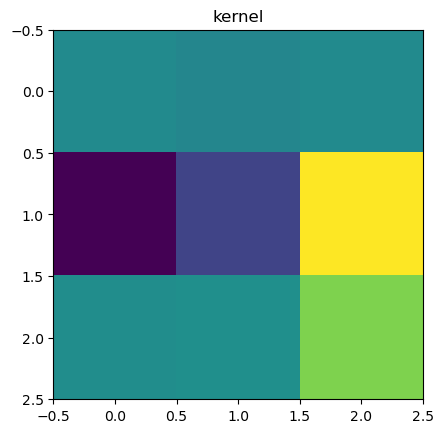

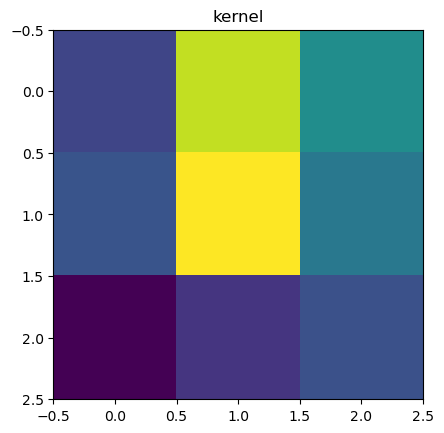

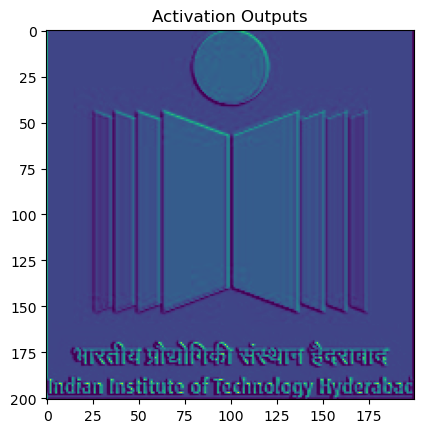

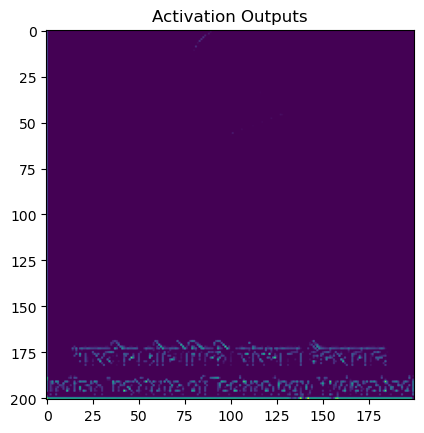

In [14]:
activationOutputsRelu,kernelsRelu = Convolution_layer(img,numOfFilter=2,kernelDim=3,stride=1,padding=1,activationFunction=relu)

# Iterate over the kernelsSigmoid array to display each kernel
for i in range(kernelsRelu.shape[3]):
    displayImg(kernelsRelu[:,:,0,i],"kernel")

# Iterate over the activationOutputsSigmoid array to display each activation output
for row in range(activationOutputsRelu.shape[2]):
    displayImg(activationOutputsRelu[:,:,row],"Activation Outputs")


Q4)
Pooling layer function: It accepts as input the activation map volume, the pooling function, stride, and generates a pooled output volume. A special case for performing Global Average Pooling should also be provided.

In [15]:
def PoolingLayer(activationMapVolume,poolFunction,pool,stride=2):

    # Check if the pooling function is "Global Average Pooling"
    if(poolFunction=="Global Average Pooling"):
        # Apply global average pooling across each channel independently
        return np.stack([np.mean(activationMapVolume[:,:,c]) for c in range(activationMapVolume.shape[2])], axis=0)

    # Check if the input image has more than 2 dimensions
    if len(activationMapVolume.shape) > 2:
         # Apply pooling operation to each channel separately
        return np.stack([Pooling(activationMapVolume[:,:,c],poolFunction, pool, stride) for c in range(activationMapVolume.shape[2])], axis=-1)
    else:
        # Apply pooling operation to the single-channel image
        return Pooling(activationMapVolume,poolFunction,pool,stride)

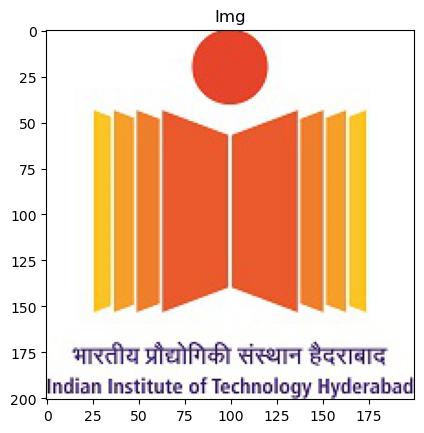

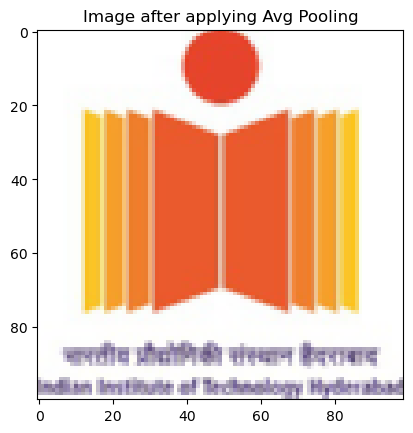

In [16]:
displayImg(img,"Img")
pool_img = PoolingLayer(img,avgPoolingFunction,3,2)
displayImg(pool_img,title="Image after applying Avg Pooling")


Q5)
Multilayer Perceptron (MLP) function: It accepts as input a vector, the number of hidden layers, the size of each hidden layer, the non-linear function, and the size of the output layer. This function should generate an output vector of the specified size. Generate the output with and without the softmax function applied to the output layer.

In [17]:
def MLP(input,numHiddenLayers,hiddenLayerSize,activationFunction,outputLayerSize,softMaxFun=False):

    # Determine the size of the input
    inputSize = len(input)

    # Initialize lists to store weights and biases for hidden layers
    perHiddenLayerWeights =[]
    perHiddenLayerBias =[]

    # Initialize previous layer size as input size
    preLayerWeights = inputSize

    # Generate weights for each hidden layer
    for i in range(numHiddenLayers):
        hiddenLayerWeight = np.random.randn(preLayerWeights,hiddenLayerSize)
        perHiddenLayerWeights.append(hiddenLayerWeight)
        preLayerWeights = hiddenLayerSize

    # Generate weights for the output layer
    outputLayerWeight = np.random.randn(preLayerWeights,outputLayerSize)

    # Generate biases for each hidden layer
    for i in range(numHiddenLayers):
        hiddenLayerBias = np.random.randn(hiddenLayerSize)
        perHiddenLayerBias.append(hiddenLayerBias)

    # Generate biases for the output layer
    outputLayerBias = np.random.randn(outputLayerSize)

    # Calculate output of the first hidden layer
    hnOutput = activationFunction(np.dot(input,perHiddenLayerWeights[0])+perHiddenLayerBias[0])

     # Calculate output for subsequent hidden layers
    for i in range(1,len(perHiddenLayerWeights) - 1):
        hnOutput = activationFunction(np.dot(hnOutput, perHiddenLayerWeights[i]) + perHiddenLayerBias[i])

    # Calculate output of the output layer
    houtOutput = np.dot(hnOutput,outputLayerWeight)+outputLayerBias

    # Apply softmax function if specified
    if softMaxFun is False:
        return houtOutput
    else:
        return softMax(houtOutput)


In [18]:
np.random.seed(101)
output = MLP(input=np.random.randn(100),numHiddenLayers=1,hiddenLayerSize=100,activationFunction=sigmoid,outputLayerSize=4,softMaxFun=True)
output

array([2.35365784e-07, 2.88755153e-04, 9.99710720e-01, 2.89687124e-07])

Q6)

Putting-it all together: Finally, use the functions you have written to implement a CNN with the following architecture. The CNN must accept an image input and output a vector of appropriate dimension. In other words, the function must effectively implement the feed-forward path in a CNN. (5) 

- Input image of size 224×224×3. Use validation images (or, random crops) from the ILSVRC dataset. 
- Convolution layer with 16 kernels of size 5 × 5 spatial dimensions and ReLU activation.
- Max pooling layer of size 2 × 2 with a stride of 2 along each dimension.
- Convolution layer with 32 kernels of spatial size 3 × 3 and sigmoid activation.
- Max pooling layer of size 2 × 2 with a stride of 2 along each dimension.
- A Global Average Pooling (GAP) layer.
- An MLP with one hidden layer (size same as input) that accepts as input the previous layer’s output and maps it to 1000 output nodes. Use ReLU activation for the MLP (softmax in the o/p layer).

Verify that your composition of function accepts an image input and outputs a vector.



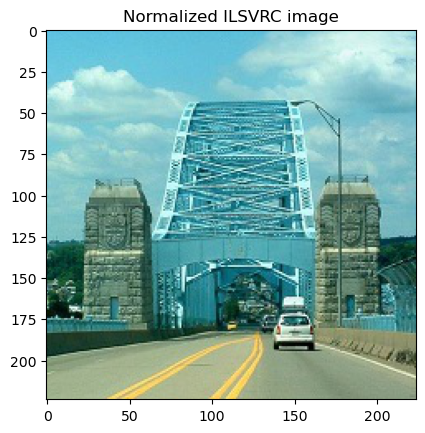

output vector [1.05967645e-09 3.45155224e-20 9.81302340e-21 8.49469932e-07
 3.10016720e-05 5.65792862e-09 1.18288058e-10 2.02796309e-14
 4.88718995e-07 4.05758065e-17 7.84441434e-15 5.88584791e-06
 1.21916914e-15 7.75941539e-16 7.50829154e-22 1.74084434e-11
 6.70309665e-19 5.77520337e-12 5.48752610e-17 4.97681593e-12
 3.70879867e-08 4.76737414e-13 1.02422881e-11 9.15217245e-13
 1.50270797e-09 1.01829602e-12 9.04515766e-19 1.98700235e-12
 2.61867683e-15 1.01142206e-19 3.40954272e-10 3.34327644e-10
 1.02297511e-15 4.63997897e-15 2.10102231e-13 1.53564522e-11
 5.56864997e-18 3.80990760e-20 1.42093937e-12 1.27448728e-10
 2.45985064e-16 2.16699381e-08 1.15935414e-12 3.38617677e-14
 1.80887116e-11 8.28736402e-15 1.62644648e-12 4.26263636e-16
 3.47014973e-12 1.33959894e-11 5.08761010e-10 3.43527500e-09
 3.64440490e-15 1.25019424e-20 1.03268079e-17 1.23342505e-11
 3.50704074e-08 6.56018527e-13 2.72865427e-10 2.78046144e-16
 1.37419633e-14 1.60105227e-13 5.93183939e-12 6.22207894e-15
 1.6374491

In [19]:
img = mpimg.imread("ILSVRC.jpg") / 255.0
displayImg(img,"Normalized ILSVRC image")

# Apply convolution layer
output_activation, filters = Convolution_layer(img,numOfFilter=16,kernelDim=5,stride=2, padding=0, activationFunction= relu)

# Apply pooling
pooled_output = PoolingLayer(output_activation, poolFunction = maxPoolingFunction, pool=2, stride=2)

# Apply convolution layer
output_activation, filters = Convolution_layer(pooled_output, numOfFilter=32, kernelDim=3, stride=2, padding=0, activationFunction= sigmoid)

# Apply pooling
pooled_output = PoolingLayer(output_activation, poolFunction = maxPoolingFunction, pool=2, stride=2)

# Apply pooling layer
pooled_output = PoolingLayer(pooled_output, poolFunction= "Global Average Pooling", pool=2, stride=1)

# Apply MLP 
output_vector = MLP(pooled_output, numHiddenLayers=1, hiddenLayerSize=20, activationFunction= relu, outputLayerSize=1000,softMaxFun=True)

print("output vector",output_vector)

Q7)

The adding problem: In this task, each data sample consists of a sequence of variable length, but a constant depth (size of feature vector at each time instance) of 2. All values of the first di mension (randomly) lie in [0, 1], and the second dimension is all zeros except for two elements that are marked by 1. The objective of the task is to sum the random values whose second dimensions are marked by 1. Train the different RNNs (Elmon network, LSTM, and GRU) discussed in the class and compare their performance against a baseline that always predicts a sum of 1 plotting the learning curves and final performance. Note that you are expected to implement these models (as opposed to using the built-in constructs).

The following table presents two data samples (x) along with their labels (y). Note that the samples should be of different lengths (n), so the dimensions of each sample can be represented as n × 2. Given examples have lengths of 5 and 8 respectively. You have to generate/create a big dataset (≥ 5000) of such samples for training and testing of the RNNs.

In [20]:
device = ("cuda" if torch.cuda.is_available() else "cpu")
device

'cpu'

In [21]:
def generateDateSet(length):

  X = []
  Y = []

  for _ in range(length):

    # Generate a random length for the input data between 5 and 10
    length = np.random.randint(5, 10)

    # Generate random values for the first feature (X0)
    X0 = np.random.rand(length)
    # Initialize the second feature (X1) with zeros
    X1 = np.zeros(length)
    # Randomly select two positions in X1 and set them to 1
    OnesPos = np.random.choice(length, 2, replace=False)
    X1[OnesPos[0]] = 1
    X1[OnesPos[1]] = 1

    # Stack X0 and X1 vertically and convert to PyTorch tensor, then append to X
    X.append(torch.from_numpy(np.vstack((X0, X1)).T).double())
    
    # Calculate the output (Y) by summing the values at the positions selected in X0
    Y.append(torch.from_numpy(np.array(X0[OnesPos[0]] + X0[OnesPos[1]])).double())

  return X,Y

In [22]:
X,Y = generateDateSet(5000)

ELmon RNN Architecture

![Image Description][def]

[def]: RNN.png

In [23]:
class ELmonRNN(nn.Module):

  def __init__(self, inputLayerSize, hiddenLayerSize, OutputLayerSize):
    super().__init__()


    # Define weights
    self.U = nn.Linear(inputLayerSize, hiddenLayerSize  , bias=False )
    self.W = nn.Linear(hiddenLayerSize, hiddenLayerSize)
    self.V = nn.Linear(hiddenLayerSize, OutputLayerSize)
    self.double()

  def forward(self, input, preHiddenState):

    # Compute activation of input layer
    U_x = self.U(input)

    # Compute activation of hidden layer with recurrent connection
    Wh_preH = self.W(preHiddenState)
    Ht = torch.tanh(U_x + Wh_preH)

    # Compute output prediction
    yPred = self.V(Ht)

    return Ht,yPred


In [24]:
maxEpoch= 10
hiddenLayerSize=5
inputLayerSize=2
OutputLayerSize=1
learningRate=0.005

In [25]:
torch.manual_seed(101)
ModelELmonRNN = ELmonRNN(inputLayerSize,hiddenLayerSize,OutputLayerSize).to(device)
print(ModelELmonRNN)

ELmonRNN(
  (U): Linear(in_features=2, out_features=5, bias=False)
  (W): Linear(in_features=5, out_features=5, bias=True)
  (V): Linear(in_features=5, out_features=1, bias=True)
)


In [26]:
LossListELmonRNN = []

# Define the Mean Squared Error loss function
MSE = nn.MSELoss()

# Define the Adam optimizer and associate it with the parameters of the ElmonRNN model
optimizer = torch.optim.Adam(ModelELmonRNN.parameters(), lr = learningRate)

for epoch in range(maxEpoch):

    loss = []

    for x, y in zip(X,Y):
        
        # Reset gradients
        ModelELmonRNN.zero_grad()
        currentLoss = 0

        # Initialize hidden state for each sample
        preH =  torch.zeros(1, hiddenLayerSize, requires_grad=False,dtype=torch.float64).to(device)

        # Transfer data to the appropriate device
        x, y = x.to(device), y.to(device)

        # Iterate over each time step in the input sequence
        for row in range(x.shape[0]):
            preH,yPred  = ModelELmonRNN(x[row,:], preH)


        # Compute the current loss
        currentLoss = MSE(yPred, y)

        # Perform back propagation to compute gradients
        currentLoss.backward()

        # Clipping the gradient to prevent exploding gradients
        nn.utils.clip_grad_norm_(ModelELmonRNN.parameters(), 3)

        # Updating model parameters
        optimizer.step()

        loss.append(currentLoss.detach().item())

    LossListELmonRNN.append( torch.tensor(loss).mean())

    print(f"Epoch: {epoch+1} Loss: ",LossListELmonRNN[-1] )

d:\ANNACODA\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1 Loss:  tensor(0.0548)
Epoch: 2 Loss:  tensor(0.0133)
Epoch: 3 Loss:  tensor(0.0103)
Epoch: 4 Loss:  tensor(0.0092)
Epoch: 5 Loss:  tensor(0.0086)
Epoch: 6 Loss:  tensor(0.0083)
Epoch: 7 Loss:  tensor(0.0081)
Epoch: 8 Loss:  tensor(0.0080)
Epoch: 9 Loss:  tensor(0.0079)
Epoch: 10 Loss:  tensor(0.0078)


In [27]:
def plotEpochLoss(Epoch,Loss,title):

    plt.plot(Epoch,Loss, marker='o', linestyle='-')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(title)

    plt.show()

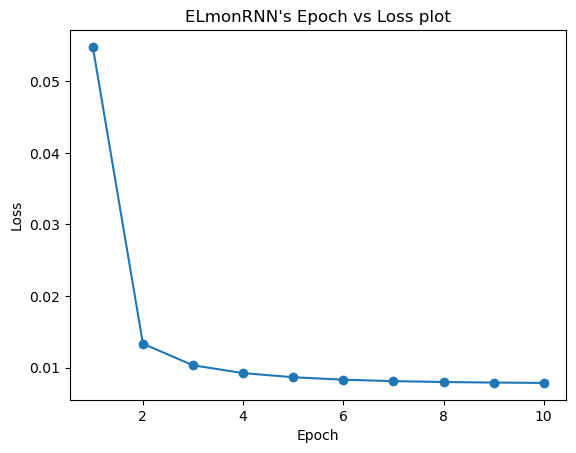

In [28]:
plotEpochLoss(list(range(1,11)),LossListELmonRNN,"ELmonRNN's Epoch vs Loss plot")

LSTM architecture

![Image Description][def]

[def]: LSTM.png

In [29]:
class LSTM(nn.Module):
    def __init__(self, inputStateSize, hiddenStateSize, outputLayerSize):
        super().__init__()


        # Define weights for forget gate, input gate,cell memory, and output gate

        self.Uf = nn.Linear(inputStateSize, hiddenStateSize  , bias=False )
        self.Ui = nn.Linear(inputStateSize, hiddenStateSize  , bias=False )
        self.Ucm = nn.Linear(inputStateSize, hiddenStateSize  , bias=False )
        self.Uo = nn.Linear(inputStateSize, hiddenStateSize  , bias=False )

        self.Wf = nn.Linear(hiddenStateSize, hiddenStateSize)
        self.Wi = nn.Linear(hiddenStateSize, hiddenStateSize)
        self.Wcm = nn.Linear(hiddenStateSize, hiddenStateSize)
        self.Wo = nn.Linear(hiddenStateSize, hiddenStateSize)

        # Define linear transformation layer for output prediction
        self.V = nn.Linear(hiddenStateSize, outputLayerSize)

        self.double()
    
    def forward(self, inputState, prevHiddenState, prevCellState):
        
        # Compute activation of forget gate
        Uf_x = self.Uf(inputState)
        Wf_prevH = self.Wf(prevHiddenState)

        Ft = torch.sigmoid(Uf_x + Wf_prevH)


        # Compute activation of input gate
        Ui_x = self.Ui(inputState)
        Wi_prevH = self.Wi(prevHiddenState)

        It = torch.sigmoid(Ui_x + Wi_prevH)

        # Compute activation of output gate
        Uo_x = self.Uo(inputState)
        Uo_x = self.Wo(prevHiddenState)

        Ot = torch.sigmoid(Uo_x + Uo_x)     


        # Compute activation of cell memory
        Ucm_x = self.Ucm(inputState)
        Wcm_prevH = self.Wcm(prevHiddenState)
        
        CMt = torch.tanh(Ucm_x + Wcm_prevH)

        # Compute cell state at current time step
        Ct = (Ft * prevCellState) + ( It * CMt)

        # Compute hidden state at current time step
        Ht = Ot * torch.tanh(Ct)

        # Compute output prediction
        yPred = self.V(Ht)

        return Ht, Ct, yPred

In [30]:
maxEpoch= 10
hiddenLayerSize=5
inputLayerSize=2
OutputLayerSize=1
learningRate=0.005

In [31]:
ModelLSTM = LSTM(inputLayerSize,hiddenLayerSize,OutputLayerSize).to(device)
print(ModelLSTM)

LSTM(
  (Uf): Linear(in_features=2, out_features=5, bias=False)
  (Ui): Linear(in_features=2, out_features=5, bias=False)
  (Ucm): Linear(in_features=2, out_features=5, bias=False)
  (Uo): Linear(in_features=2, out_features=5, bias=False)
  (Wf): Linear(in_features=5, out_features=5, bias=True)
  (Wi): Linear(in_features=5, out_features=5, bias=True)
  (Wcm): Linear(in_features=5, out_features=5, bias=True)
  (Wo): Linear(in_features=5, out_features=5, bias=True)
  (V): Linear(in_features=5, out_features=1, bias=True)
)


In [32]:
LossListLSTM = []

# Define the Mean Squared Error loss function
MSE = nn.MSELoss()

# Define the Adam optimizer and associate it with the parameters of the LSTM model
optimizer = torch.optim.Adam(ModelLSTM.parameters(), lr = learningRate)

for epoch in range(maxEpoch):

    loss = []

    for x, y in zip(X,Y):

        # Reset gradients
        ModelLSTM.zero_grad()

        currentLoss = 0

        # Initialize hidden state and cell state for each sample
        preH =  torch.zeros(1, hiddenLayerSize, requires_grad=False,dtype=torch.float64).to(device)
        preC =  torch.zeros(1, hiddenLayerSize, requires_grad=False,dtype=torch.float64).to(device)


        # Transfer data to the appropriate device
        x, y = x.to(device), y.to(device)

        # Iterate over each time step in the input sequence
        for row in range(x.shape[0]):
            preH,preC,yPred = ModelLSTM(x[row,:], preH,preC)


        # Compute the current loss
        currentLoss = MSE(yPred, y)

        # Perform back propagation to compute gradients
        currentLoss.backward()

        # Clipping the gradient to prevent exploding gradients
        nn.utils.clip_grad_norm_(ModelLSTM.parameters(), 3)

        # Updating model parameters
        optimizer.step()

        loss.append(currentLoss.detach().item())

    LossListLSTM.append( torch.tensor(loss).mean().item())

    print(f"Epoch: {epoch+1} Loss: ",LossListLSTM[-1] )

Epoch: 1 Loss:  0.03906938433647156
Epoch: 2 Loss:  0.001491133007220924
Epoch: 3 Loss:  0.0007939193747006357
Epoch: 4 Loss:  0.0006328726885840297
Epoch: 5 Loss:  0.0005362292286008596
Epoch: 6 Loss:  0.00048708959366194904
Epoch: 7 Loss:  0.0004469842533580959
Epoch: 8 Loss:  0.0004174777423031628
Epoch: 9 Loss:  0.00039433359052054584
Epoch: 10 Loss:  0.0003743158304132521


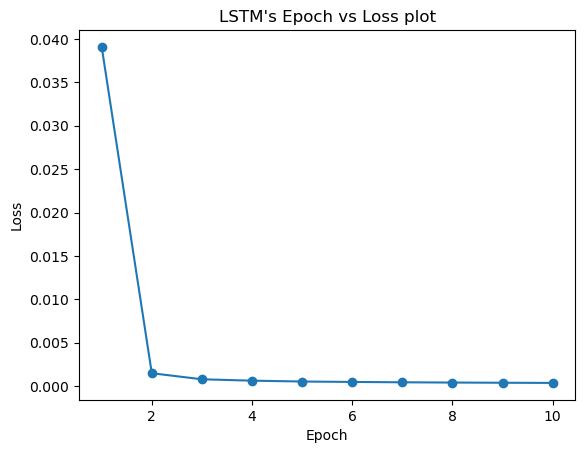

In [33]:
plotEpochLoss(list(range(1,11)),LossListLSTM,"LSTM's Epoch vs Loss plot")

GRU Architecture

![Image Description][def]

[def]: GRU.png

In [34]:
class GRU(nn.Module):
    def __init__(self, inputLayerSize, hiddenLayerSize, outputLayerSize):
        super().__init__()
        
        # Define weights for reset gate, update gate, and candidate hidden state
        self.Ur = nn.Linear(inputLayerSize, hiddenLayerSize  , bias=False )
        self.Uz = nn.Linear(inputLayerSize, hiddenLayerSize  , bias=False )
        self.Uh_ = nn.Linear(inputLayerSize, hiddenLayerSize  , bias=False)

        self.Wr = nn.Linear(hiddenLayerSize, hiddenLayerSize)
        self.Wz = nn.Linear(hiddenLayerSize, hiddenLayerSize)
        self.Wh_ = nn.Linear(hiddenLayerSize, hiddenLayerSize)

        # Define linear transformation layer for output prediction
        self.V = nn.Linear(hiddenLayerSize, outputLayerSize)

        self.double()
    
    def forward(self, input, preHiddenState):


        # Compute activation of reset gate
        Ur_x = self.Ur(input)
        Wr_PreH = self.Wr(preHiddenState)
        Rt = torch.sigmoid(Ur_x + Wr_PreH)
    
        # Compute activation of update gate
        Uz_x = self.Uz(input)
        Wz_preH = self.Wz(preHiddenState)
        Zt = torch.sigmoid(Uz_x + Wz_preH)

        # Compute activation of candidate hidden state
        Uh_x = self.Uh_(input)
        wh_Rt_preH = self.Wh_(Rt * preHiddenState)
        Ht_ = torch.tanh(Uh_x + wh_Rt_preH)  

        # Compute current hidden state
        Ht = ((1 - Zt) * preHiddenState) + (Zt * Ht_)

        # Compute output prediction
        yPred = self.V(Ht)
        return Ht,yPred

In [35]:
maxEpoch= 10
hiddenLayerSize=5
inputLayerSize=2
OutputLayerSize=1
learningRate=0.005

In [36]:
ModelGRU = GRU(inputLayerSize,hiddenLayerSize,OutputLayerSize).to(device)
print(ModelGRU)

GRU(
  (Ur): Linear(in_features=2, out_features=5, bias=False)
  (Uz): Linear(in_features=2, out_features=5, bias=False)
  (Uh_): Linear(in_features=2, out_features=5, bias=False)
  (Wr): Linear(in_features=5, out_features=5, bias=True)
  (Wz): Linear(in_features=5, out_features=5, bias=True)
  (Wh_): Linear(in_features=5, out_features=5, bias=True)
  (V): Linear(in_features=5, out_features=1, bias=True)
)


In [37]:
LossListGRU = []

# Define the Mean Squared Error loss function
MSE = nn.MSELoss()

# Define the Adam optimizer and associate it with the parameters of the GRU model
optimizer = torch.optim.Adam(ModelGRU.parameters(), lr = learningRate)

for epoch in range(maxEpoch):

    loss = []

    for x, y in zip(X,Y):

        # Reset gradients
        ModelGRU.zero_grad()

        currentLoss = 0

        # Initialize hidden state for each sample
        preH =  torch.zeros(1, hiddenLayerSize, requires_grad=False,dtype=torch.float64).to(device)


        # Transfer data to the appropriate device
        x, y = x.to(device), y.to(device)
        OUT = 0


        # Iterate over each time step in the input sequence
        for row in range(x.shape[0]):
            preH,yPred = ModelGRU(x[row,:], preH)

        # Compute the current loss
        currentLoss = MSE(yPred, y)

        # Perform back propagation to compute gradients
        currentLoss.backward()

        # Clipping the gradient to prevent exploding gradients
        nn.utils.clip_grad_norm_(ModelGRU.parameters(), 3)

        # Updating model parameters
        optimizer.step()

        loss.append(currentLoss.detach().item())

    LossListGRU.append( torch.tensor(loss).mean().item())

    print(f"Epoch: {epoch+1} Loss: ",LossListGRU[-1] )

Epoch: 1 Loss:  0.030767953023314476
Epoch: 2 Loss:  0.0008847290882840753
Epoch: 3 Loss:  0.0006197693874128163
Epoch: 4 Loss:  0.0005130172939971089
Epoch: 5 Loss:  0.0004443053621798754
Epoch: 6 Loss:  0.00038688763743266463
Epoch: 7 Loss:  0.0003393107035662979
Epoch: 8 Loss:  0.0003010981890838593
Epoch: 9 Loss:  0.0002709008113015443
Epoch: 10 Loss:  0.00024701410438865423


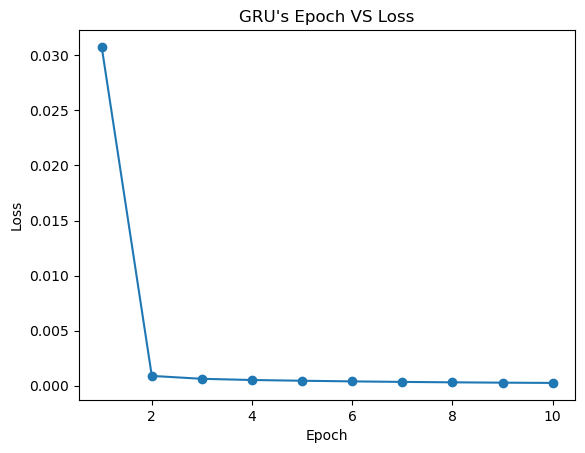

In [38]:
plotEpochLoss(list(range(1,11)),LossListGRU,"GRU's Epoch VS Loss")

Calculating Baseline Line Loss

Calculating the baseline loss involves obtaining the true values (y_true) from the target labels and comparing them with predicted values (y_pred) always set to 1, then computing the MSE.

In [39]:
lossListBaseLine = []
for epoch in range(maxEpoch):
    loss = []
    for X_sample, Y_target in zip(X, Y):
        baseline_loss = MSE(torch.tensor(1), Y_target)
        loss.append(baseline_loss.detach().item())
    lossListBaseLine.append(torch.tensor(loss).mean())


Comparison of Baseline loss, ElmonRNN loss, LSTM loss, and GRU loss

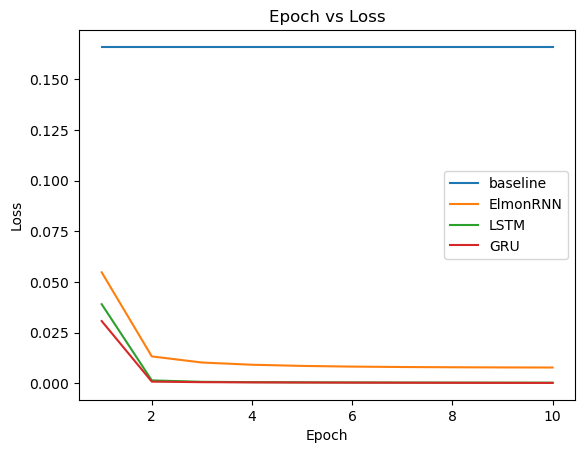

In [40]:
plt.plot(range(1,11), lossListBaseLine, label="baseline")
plt.plot(range(1,11), LossListELmonRNN, label="ElmonRNN")
plt.plot(range(1,11), LossListLSTM, label="LSTM")
plt.plot(range(1,11), LossListGRU,label="GRU")
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()